## Elbow method

In [234]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
df = pd.read_csv('../data/country-data.csv')
df = df.drop('country', axis=1)

In [235]:
### minmax scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [544]:
def evaluate_clusters_plot(df: pd.DataFrame, startrange = 2, stoprange = 25, cluster_method = KMeans()) -> None:
    '''
    Evaluate clusters using the Davies Bouldin Score, Silhouette Score and Calinski Harabasz Score.
    Plot the results for each metric.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe to be used for clustering evaluation
    startrange : int, optional
        Starting number of clusters. The default is 2.
    stoprange : int, optional
        Stopping number of clusters. The default is 25.
    cluster_method : sklearn.cluster, optional
        Clustering method to be used. The default is KMeans.
        Another example: cluster_method = AgglomerativeClustering.

    Returns
    -------
    None.
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
    resultsa = {}
    resultsb = {}
    resultsc = {}
    
    for i in range(startrange, stoprange):
        cluster = cluster_method
        cluster = cluster(n_clusters=i)
        labels = cluster.fit_predict(df)
        labels = cluster.labels_
        
        db_index = davies_bouldin_score(df, labels)
        resultsa.update({i: db_index})
        db_index = silhouette_score(df, labels)
        resultsb.update({i: db_index})
        db_index = calinski_harabasz_score(df, labels)
        resultsc.update({i: db_index})

    fig.suptitle(f'Evaluation Metrics for {str(cluster_method())[:-2]}', fontsize=15)
    ax1.plot(list(resultsa.keys()), list(resultsa.values()), marker='o')
    ax1.set_title('Davies Bouldin Score', fontsize=15)
    ax2.plot(list(resultsb.keys()), list(resultsb.values()), marker='o')
    ax2.set_title('Silhouette Score', fontsize=15)
    ax3.plot(list(resultsc.keys()), list(resultsc.values()), marker='o')
    ax3.set_title('Calinski Harabasz Score', fontsize=15)

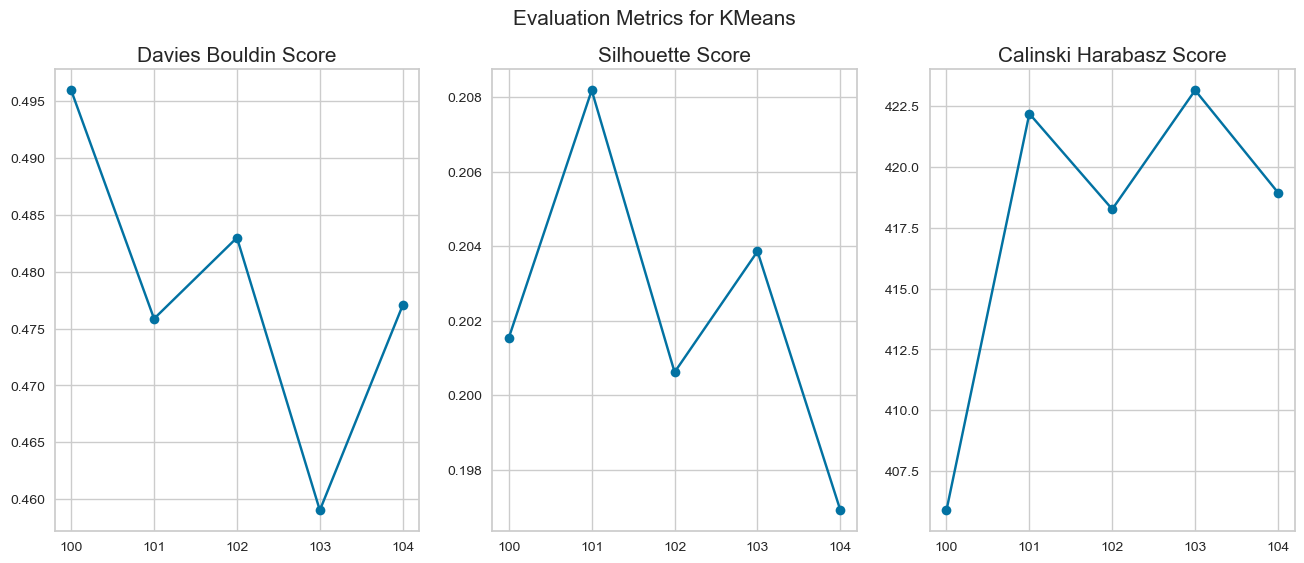

In [585]:
evaluate_clusters_plot(df_scaled, cluster_method=KMeans, startrange=100, stoprange=105)

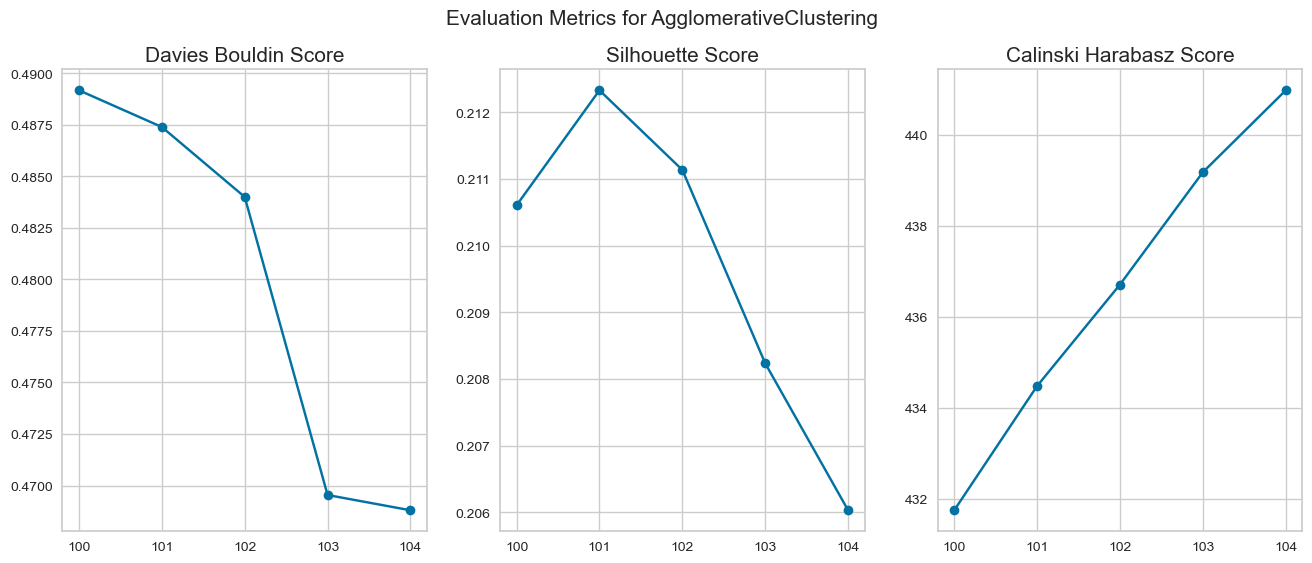

In [595]:
evaluate_clusters_plot(df_scaled, cluster_method=AgglomerativeClustering, startrange=100, stoprange=105)